In [2]:
import pandas as pd
df_NtuOrderOri = pd.read_csv('data/Ntu_Orders.csv')
df_Ecoupon = pd.read_table('data/NTU_1317_Ecoupon.txt')
df_Member = pd.read_table('data/NTU_1317_Member.txt')
df_Promo = pd.read_table('data/NTU_1317_Promotion.txt')
df_PromoOrder = pd.read_table('data/NTU_1317_PromotionOrders.txt')

/home/sopper/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
df_NtuOrderOri[df_NtuOrderOri['MemberId']=='461D62AA-5143-4AD9-BA04-50FB5B8A70A7']

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
292016,50882203,20180102,461D62AA-5143-4AD9-BA04-50FB5B8A70A7,50945945,1317,9905,b'\xbf!\x0c\x0bz-\xe7\xbe\n0\x1b\x8br?\x1b\xbe...,Web,Brand,Mobile,...,250.0,-388.0,0.0,112.0,2018-01-02 13:22:35.317,Finish,SevenEleven,SevenEleven,NaN,False


In [3]:
df_NtuOrderOri[['SalesOrderSlaveId', 'Quantity', 'UnitPrice', 'PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment']].head()

,SalesOrderSlaveId,Quantity,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment
0,26914456,1,399.0,-25.0,0.0,374.0
1,26914457,1,399.0,-25.0,0.0,374.0
2,26767644,1,350.0,-34.0,0.0,316.0
3,26780512,1,540.0,-57.0,0.0,483.0
4,26823950,1,445.0,-44.0,0.0,401.0


先新增一個欄位：promotionDiscUse, 將有使用promotion折扣的SalesOrderSlaveId表示為1

In [4]:
df_NtuOrderOri1 = df_NtuOrderOri.copy()
df_NtuOrderOri1['PromotionDisUse'] = False
df_NtuOrderOri1['PromotionDisUse'][df_NtuOrderOri1['PromotionDiscount']<0] = True
df_NtuOrderOri1.head()

/home/sopper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,PromotionDisUse
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False,True
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,True
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False,True
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,-57.0,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False,True
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,-44.0,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False,True


 再新增一個欄位：EcouponDiscount, 將有使用Ecoupon折扣的SalesOrderSlaveId表示為1

In [6]:
df_NtuOrderOri1['EcouponDisUse'] = False
df_NtuOrderOri1['EcouponDisUse'][df_NtuOrderOri1['EcouponDiscount']<0] = True
df_NtuOrderOri1.head()

/home/sopper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,PromotionDisUse,EcouponDisUse
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False,True,False
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,True,False
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False,True,False
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False,True,False
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False,True,False


接著創一個欄位orderSum, 來計算總訂單量

In [7]:
df_NtuOrderOri1['orderSum'] = 1

接著groupby MemberId, 並計算PromotionDisUse/EcouponDisUse的sum

In [8]:
data = df_NtuOrderOri1.groupby('MemberId')['PromotionDisUse', 'EcouponDisUse', 'orderSum'].sum()
df_countOfAct_byMemId = pd.DataFrame(data)
df_countOfAct_byMemId.head()

,PromotionDisUse,EcouponDisUse,orderSum
MemberId,,,
00002962-4E01-4D5B-A23C-AF05A965212E,19.0,0.0,20
000037B9-82D7-4F41-A748-FD64AF00A535,5.0,0.0,5
00004BE7-17B5-4DA8-A31D-673BCD22F018,0.0,0.0,1
00008557-6564-46EB-8B00-70D3DEE91FF0,0.0,2.0,4
000248F1-4864-40B7-A987-E27884C0971C,0.0,0.0,3


滿有趣的，訂單總數與活動，發現有一個會員17筆訂單但用了17筆PromotionDisUse和EcouponDisUse

新增一個欄位actOrderPercent，來儲存(PromotionDisUse+EcouponDisUse/orderSum)*100

In [12]:
df_countOfAct_byMemId['actOrderPercent(%)'] = 100 * (df_countOfAct_byMemId['PromotionDisUse']+df_countOfAct_byMemId['EcouponDisUse'])/df_countOfAct_byMemId['orderSum']
df_countOfAct_byMemId.head()

,PromotionDisUse,EcouponDisUse,orderSum,actOrderPercent(%)
MemberId,,,,
00002962-4E01-4D5B-A23C-AF05A965212E,19.0,0.0,20,95.0
000037B9-82D7-4F41-A748-FD64AF00A535,5.0,0.0,5,100.0
00004BE7-17B5-4DA8-A31D-673BCD22F018,0.0,0.0,1,0.0
00008557-6564-46EB-8B00-70D3DEE91FF0,0.0,2.0,4,50.0
000248F1-4864-40B7-A987-E27884C0971C,0.0,0.0,3,0.0


In [44]:
df_countOfAct_byMemId[df_countOfAct_byMemId['actOrderPercent(%)']>100].head()

,PromotionDisUse,EcouponDisUse,orderSum,actOrderPercent(%)
MemberId,,,,
0003A373-DA78-4C59-86B2-55EC351AAF19,10.0,5.0,13,115.384615
0004840A-A290-4EE8-B9A7-FE5392A1E534,5.0,5.0,5,200.000000
0004CF57-178F-4EB8-93A6-726C7DB93FEF,2.0,3.0,4,125.000000
000592B9-8C9D-44D6-9FD9-E358594D5A20,4.0,4.0,4,200.000000
000A3964-06AB-447B-9EBE-82669B2721BC,9.0,9.0,9,200.000000


接著開始分析折扣金額/訂單金額

In [9]:
df_NtuOrderOri2 = df_NtuOrderOri.copy()
data = df_NtuOrderOri2.groupby('MemberId')['PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment'].sum()
df_pay_byMemId = pd.DataFrame(data)
df_pay_byMemId.head()

,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment
MemberId,,,
00002962-4E01-4D5B-A23C-AF05A965212E,-531.0,0.0,5926.0
000037B9-82D7-4F41-A748-FD64AF00A535,-100.0,0.0,1196.0
00004BE7-17B5-4DA8-A31D-673BCD22F018,0.0,0.0,316.0
00008557-6564-46EB-8B00-70D3DEE91FF0,0.0,-150.0,1358.0
000248F1-4864-40B7-A987-E27884C0971C,0.0,0.0,597.0


將折扣值取絕對值

In [10]:
df_pay_byMemId = df_pay_byMemId.abs()
df_pay_byMemId.head()

,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment
MemberId,,,
00002962-4E01-4D5B-A23C-AF05A965212E,531.0,0.0,5926.0
000037B9-82D7-4F41-A748-FD64AF00A535,100.0,0.0,1196.0
00004BE7-17B5-4DA8-A31D-673BCD22F018,0.0,0.0,316.0
00008557-6564-46EB-8B00-70D3DEE91FF0,0.0,150.0,1358.0
000248F1-4864-40B7-A987-E27884C0971C,0.0,0.0,597.0


接著新增一個欄位payDCPercent, 計算折扣金額/訂單金額

In [57]:
df_pay_byMemId['payDCPercent(%)'] = 100 * (df_pay_byMemId['PromotionDiscount']+df_pay_byMemId['EcouponDiscount'])/(df_pay_byMemId['SalesOrderSlaveTotalPayment']+df_pay_byMemId['PromotionDiscount']+df_pay_byMemId['EcouponDiscount'])
df_pay_byMemId.head()

,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,payDCPercent(%)
MemberId,,,,
00002962-4E01-4D5B-A23C-AF05A965212E,531.0,0.0,5926.0,8.223633
000037B9-82D7-4F41-A748-FD64AF00A535,100.0,0.0,1196.0,7.716049
00004BE7-17B5-4DA8-A31D-673BCD22F018,0.0,0.0,316.0,0.000000
00008557-6564-46EB-8B00-70D3DEE91FF0,0.0,150.0,1358.0,9.946950
000248F1-4864-40B7-A987-E27884C0971C,0.0,0.0,597.0,0.000000


接著將payDCPercent(%)與actOrderPercent(%)抽出並合併成一個dataframe

In [58]:
df_percent = pd.DataFrame({
    'actOrderPercent(%)': df_countOfAct_byMemId['actOrderPercent(%)'],
    'payDCPercent(%)':df_pay_byMemId['payDCPercent(%)']
})
df_percent.head()

,actOrderPercent(%),payDCPercent(%)
MemberId,,
00002962-4E01-4D5B-A23C-AF05A965212E,95.0,8.223633
000037B9-82D7-4F41-A748-FD64AF00A535,100.0,7.716049
00004BE7-17B5-4DA8-A31D-673BCD22F018,0.0,0.000000
00008557-6564-46EB-8B00-70D3DEE91FF0,50.0,9.946950
000248F1-4864-40B7-A987-E27884C0971C,0.0,0.000000


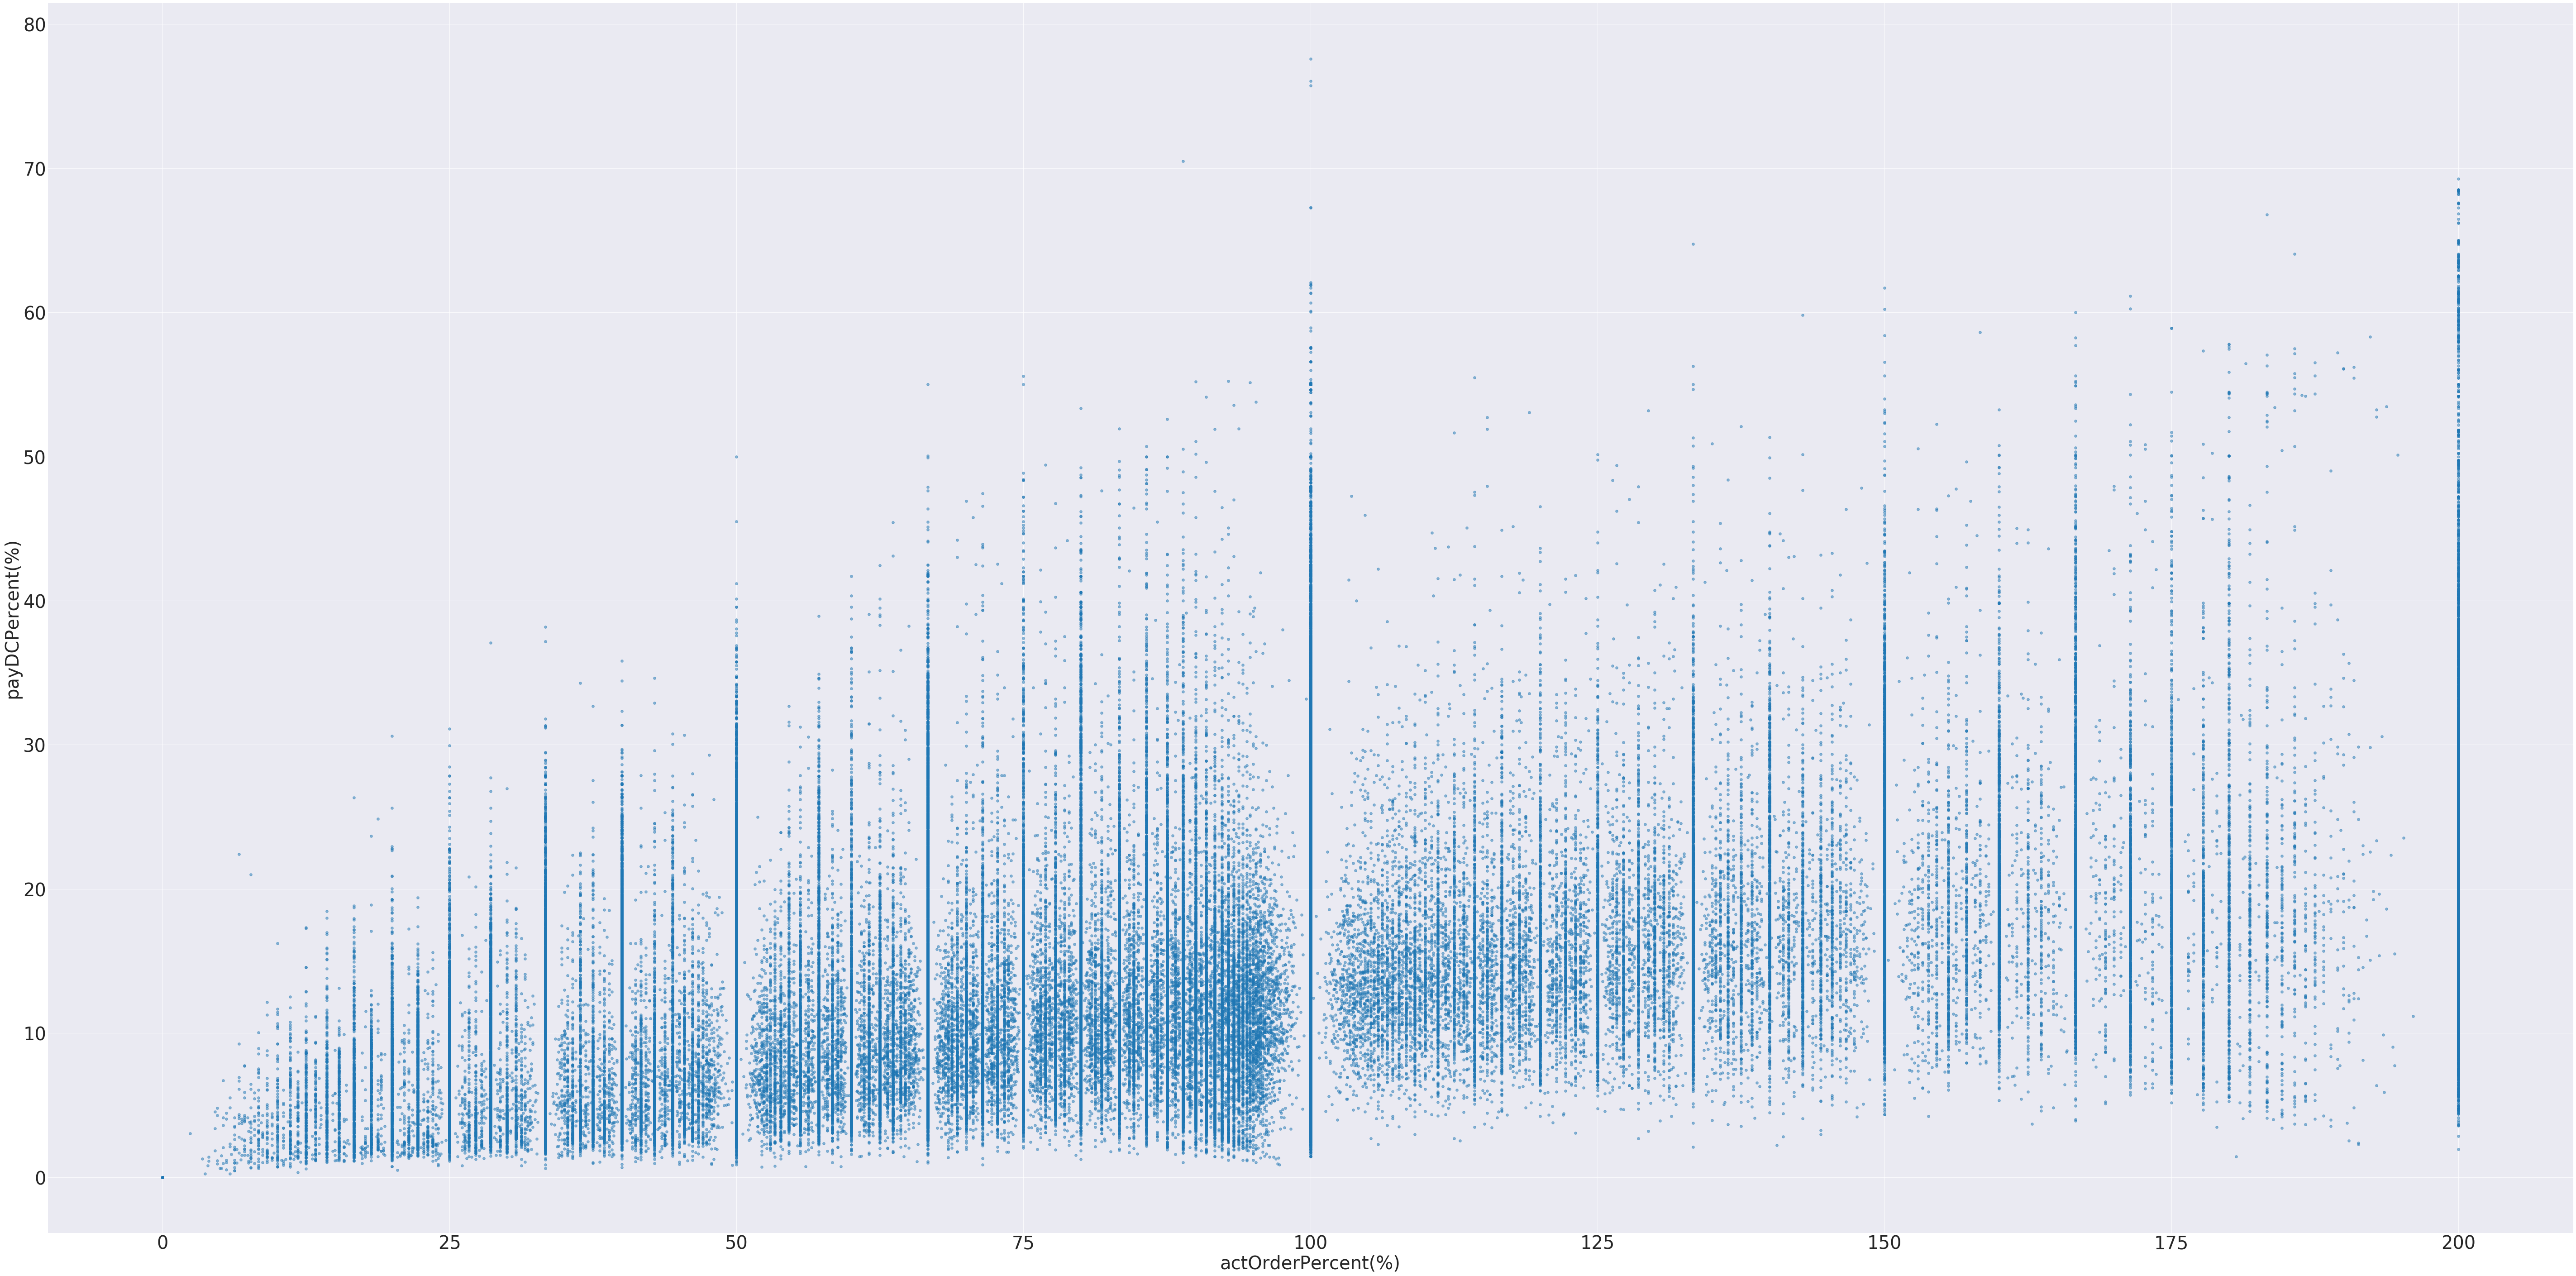

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 

matplotlib.rcParams.update({'font.size': 40})
plt.figure(figsize=(100,50))
plt.xlabel("actOrderPercent(%)")
plt.ylabel("payDCPercent(%)")
area = np.pi * 10
plt.scatter(df_percent['actOrderPercent(%)'], df_percent['payDCPercent(%)'], s=area, alpha=0.5)

plt.show()